In [33]:
import pandas as pd

#importing the dataset

dataset = pd.read_csv("C:\\Users\\abhi0\\Downloads\\glass.data",names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'], index_col=0)
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
#importing necassary libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting

from sklearn.utils import shuffle  # To shuffle the response variable


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# To save and load trained model
from joblib import dump, load

%matplotlib inline

C:\Users\abhi0\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\abhi0\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\abhi0\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


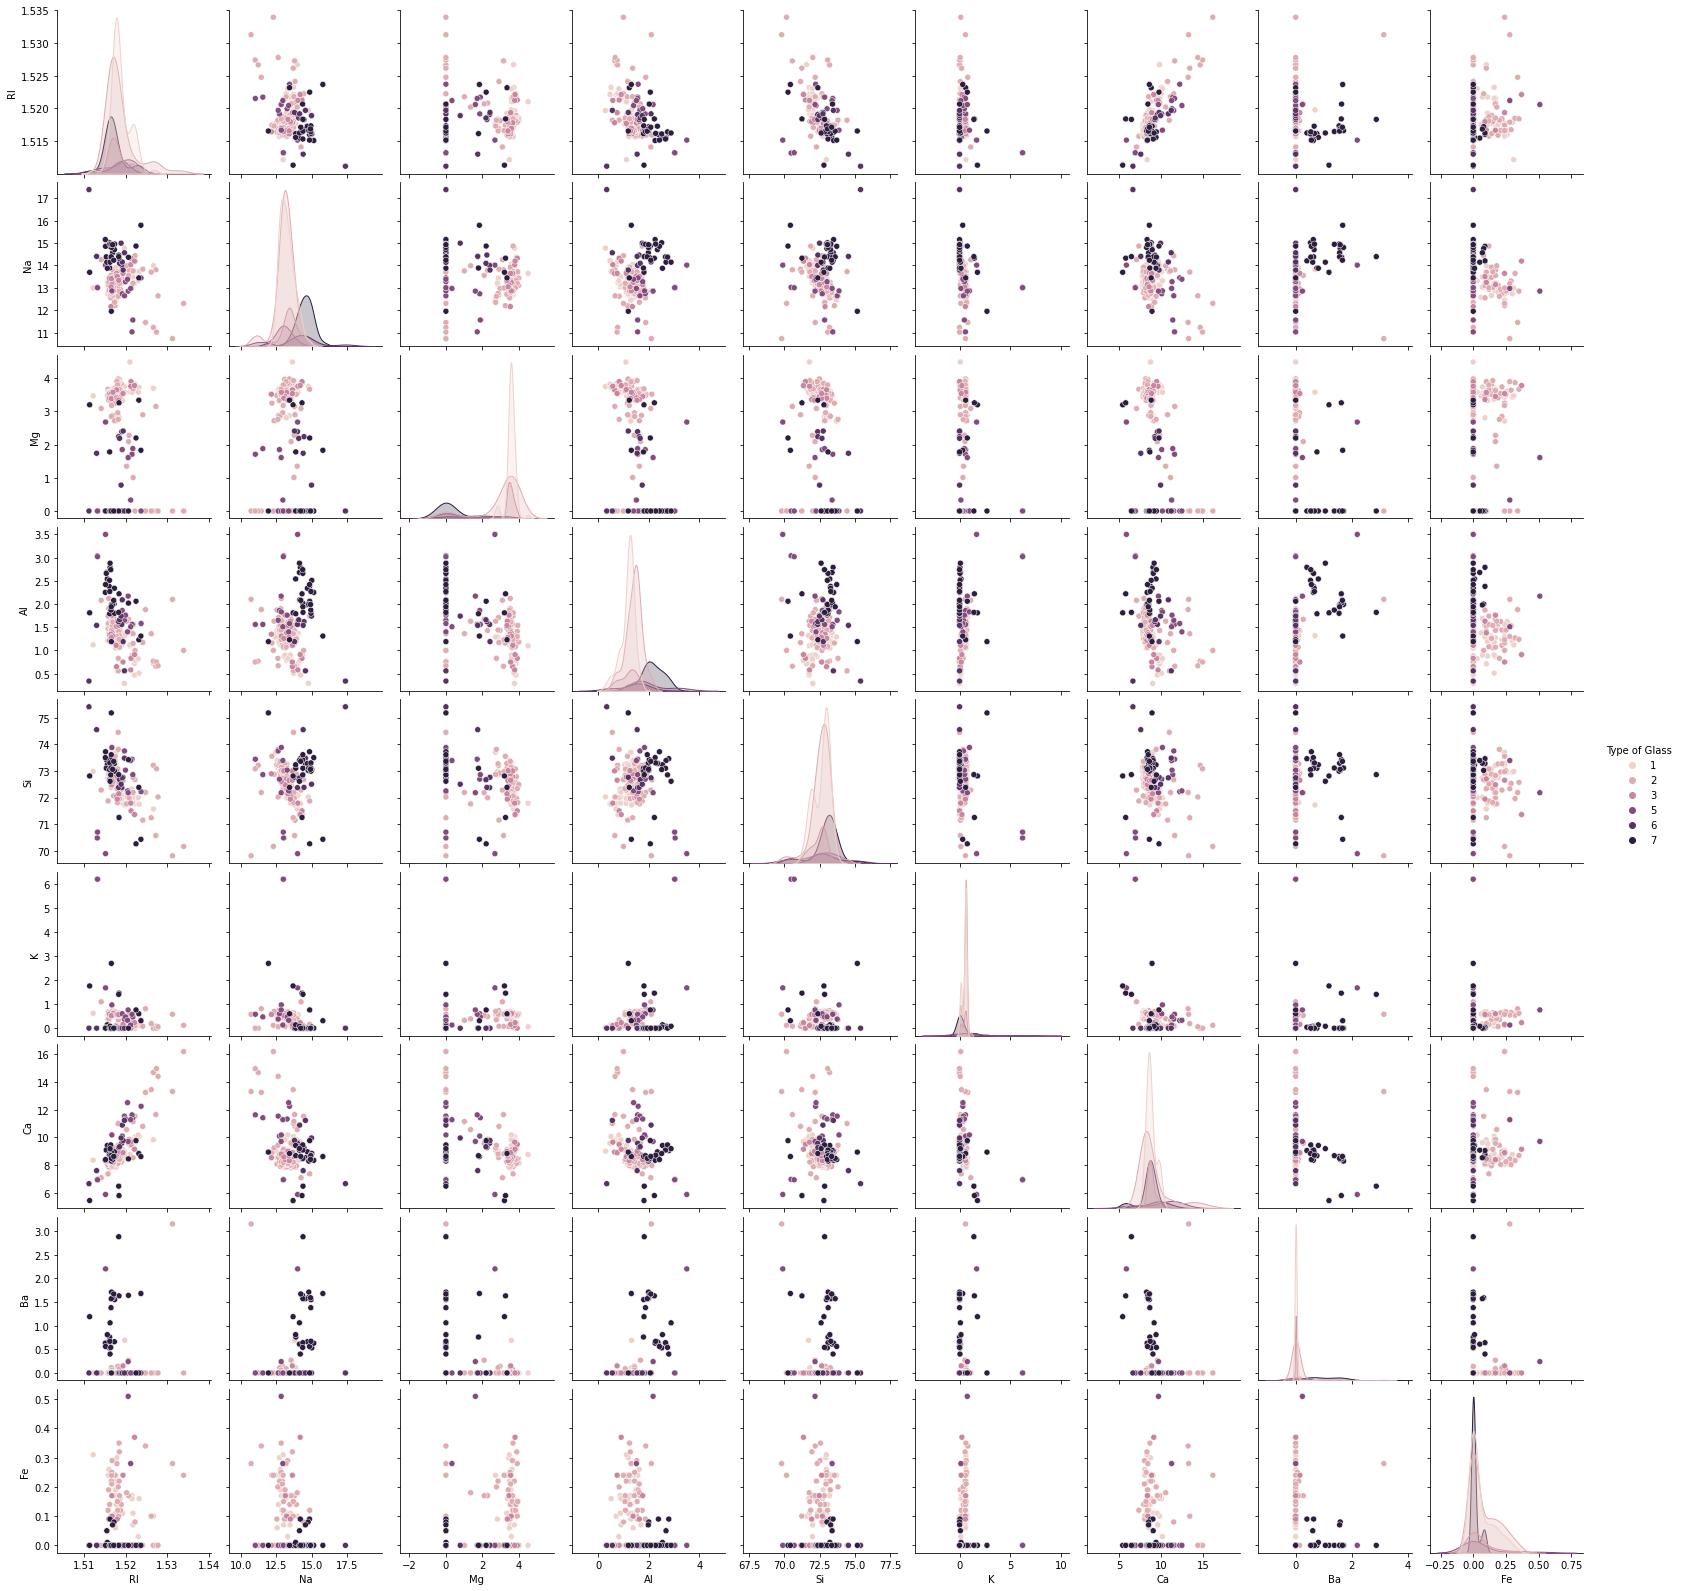

In [19]:
#pairplot for plotting
sns.pairplot(dataset,hue='Type of Glass')

# Splitting the dataset for training and testing

In [20]:
#Splitting the data into trainning and testing dataset
X= dataset.drop('Type of Glass',axis=1)
y=dataset['Type of Glass']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
# Initiate an instance of the LR
clf = LogisticRegression(random_state=101)
clf.fit(X_train, y_train)

C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=101)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
y_pred[:10]

array([2, 5, 1, 7, 1, 2, 5, 7, 1, 2], dtype=int64)

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  8  0  0  0  0]
 [ 3  9  0  0  1  0]
 [ 4  4  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  2  0  0  0  2]
 [ 0  0  0  1  0  2]]


In [26]:
precision_recall_f1 = classification_report(y_test, y_pred)
print(precision_recall_f1)


              precision    recall  f1-score   support

           1       0.65      0.62      0.63        21
           2       0.35      0.69      0.46        13
           3       0.00      0.00      0.00         8
           5       0.67      0.40      0.50         5
           6       0.00      0.00      0.00         4
           7       0.50      0.67      0.57         3

    accuracy                           0.48        54
   macro avg       0.36      0.40      0.36        54
weighted avg       0.43      0.48      0.44        54



C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_value = auc(fpr, tpr)
print('AUC is {0:.2f}'.format(auc_value))

AUC is 0.25


In [30]:
# Save your model into the output folder
dump(clf, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [31]:
clf = load('logistic_regression_model.joblib')

In [32]:
clf

LogisticRegression(random_state=101)